# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
 
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key +"&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #converting date 
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | sargatskoye
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | antofagasta
Processing Record 5 of Set 1 | badger
Processing Record 6 of Set 1 | lycksele
Processing Record 7 of Set 1 | murzuq
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | gueltat zemmour
City not found. Skipping...
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | portland
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | rurrenabaque
Processing Record 15 of Set 1 | tamanrasset
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | tazovsky
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | whitehorse
Processing Record 20 of Set 1 | ixtapa
Processing Record 21 of Set 1 | point pedro

Processing Record 36 of Set 4 | jamestown
Processing Record 37 of Set 4 | abepura
Processing Record 38 of Set 4 | minas de marcona
Processing Record 39 of Set 4 | al kharj
Processing Record 40 of Set 4 | west island
Processing Record 41 of Set 4 | taksimo
Processing Record 42 of Set 4 | pamplona
Processing Record 43 of Set 4 | lorengau
Processing Record 44 of Set 4 | port augusta
Processing Record 45 of Set 4 | lihue
Processing Record 46 of Set 4 | undurkhaan
Processing Record 47 of Set 4 | talusan
Processing Record 48 of Set 4 | toga village
City not found. Skipping...
Processing Record 49 of Set 4 | kodiak
Processing Record 0 of Set 5 | saint-philippe
Processing Record 1 of Set 5 | broken hill
Processing Record 2 of Set 5 | avarua
Processing Record 3 of Set 5 | murashi
Processing Record 4 of Set 5 | bodden town
Processing Record 5 of Set 5 | fortuna
Processing Record 6 of Set 5 | nar'yan-mar
Processing Record 7 of Set 5 | magadan
Processing Record 8 of Set 5 | christchurch
Processing

Processing Record 29 of Set 8 | malango
Processing Record 30 of Set 8 | neon karlovasion
Processing Record 31 of Set 8 | craig
Processing Record 32 of Set 8 | cockburn town
Processing Record 33 of Set 8 | konarka
Processing Record 34 of Set 8 | sao joao da barra
Processing Record 35 of Set 8 | trincomalee
Processing Record 36 of Set 8 | sos'va
Processing Record 37 of Set 8 | kuraymah
Processing Record 38 of Set 8 | tralee
Processing Record 39 of Set 8 | quellon
Processing Record 40 of Set 8 | sao gabriel da cachoeira
Processing Record 41 of Set 8 | cicero dantas
Processing Record 42 of Set 8 | horta
Processing Record 43 of Set 8 | chonchi
Processing Record 44 of Set 8 | sinop
Processing Record 45 of Set 8 | ilhabela
Processing Record 46 of Set 8 | tofol
Processing Record 47 of Set 8 | orivesi
Processing Record 48 of Set 8 | bereznik
Processing Record 49 of Set 8 | ouarzazat
Processing Record 0 of Set 9 | tabou
Processing Record 1 of Set 9 | kiunga
Processing Record 2 of Set 9 | mahiken

Processing Record 16 of Set 12 | yemetsk
Processing Record 17 of Set 12 | moab
Processing Record 18 of Set 12 | rio grande
Processing Record 19 of Set 12 | viqueque
Processing Record 20 of Set 12 | yanbu
Processing Record 21 of Set 12 | shahrud
Processing Record 22 of Set 12 | manp'o
City not found. Skipping...
Processing Record 23 of Set 12 | xining
Processing Record 24 of Set 12 | bubaque
Processing Record 25 of Set 12 | cristalina
Processing Record 26 of Set 12 | ambon
Processing Record 27 of Set 12 | vila velha
Processing Record 28 of Set 12 | tamandare
Processing Record 29 of Set 12 | pudozh
Processing Record 30 of Set 12 | hancheng
Processing Record 31 of Set 12 | susuman
Processing Record 32 of Set 12 | jinchang
Processing Record 33 of Set 12 | la toma
Processing Record 34 of Set 12 | dingwall
Processing Record 35 of Set 12 | anton lizardo
Processing Record 36 of Set 12 | kirakira
Processing Record 37 of Set 12 | soure
Processing Record 38 of Set 12 | idri
Processing Record 39 o

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,28.18,78,100,2.24,US,2023-07-17 21:49:44
1,sargatskoye,55.6101,73.4972,16.93,63,100,3.51,RU,2023-07-17 21:49:45
2,puerto ayora,-0.7393,-90.3518,29.98,91,94,3.58,EC,2023-07-17 21:49:45
3,antofagasta,-23.6500,-70.4000,17.60,78,21,1.49,CL,2023-07-17 21:49:45
4,badger,64.8000,-147.5333,23.33,52,75,2.57,US,2023-07-17 21:49:45


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,28.18,78,100,2.24,US,2023-07-17 21:49:44
1,sargatskoye,55.6101,73.4972,16.93,63,100,3.51,RU,2023-07-17 21:49:45
2,puerto ayora,-0.7393,-90.3518,29.98,91,94,3.58,EC,2023-07-17 21:49:45
3,antofagasta,-23.6500,-70.4000,17.60,78,21,1.49,CL,2023-07-17 21:49:45
4,badger,64.8000,-147.5333,23.33,52,75,2.57,US,2023-07-17 21:49:45


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
#retrieve data for plotting 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

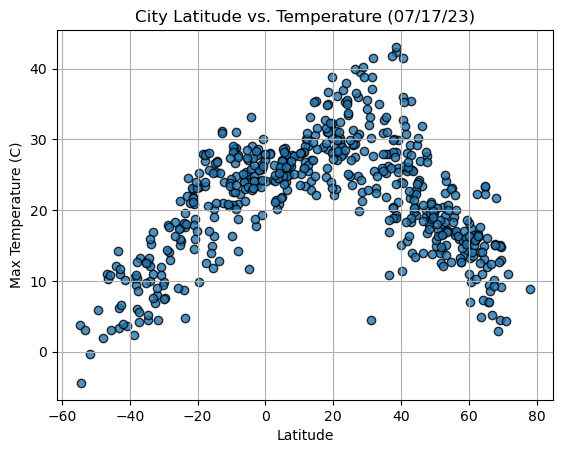

In [9]:
# Build scatter plot for latitude vs. temperature

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Temperature "+ time.strftime("(%x)"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

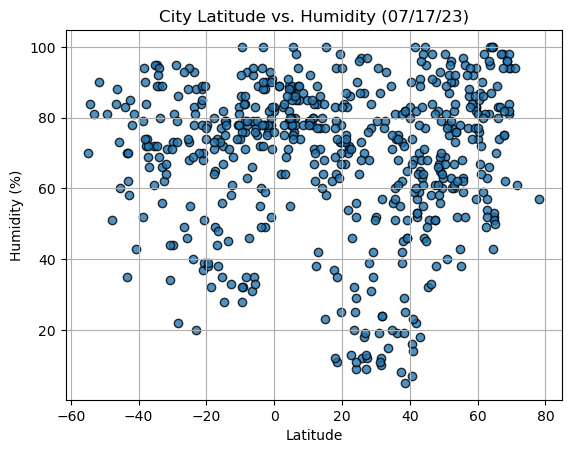

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("(%x)"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

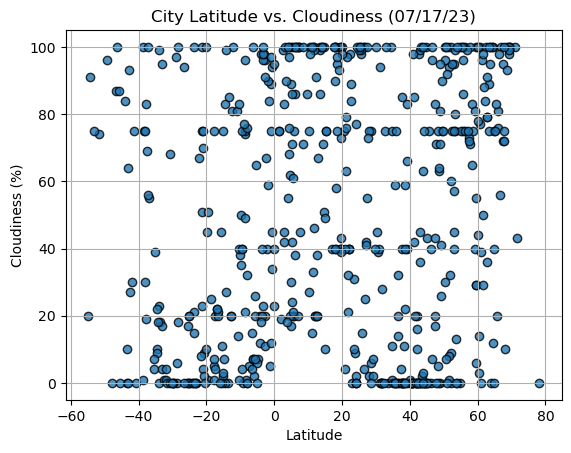

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("(%x)"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

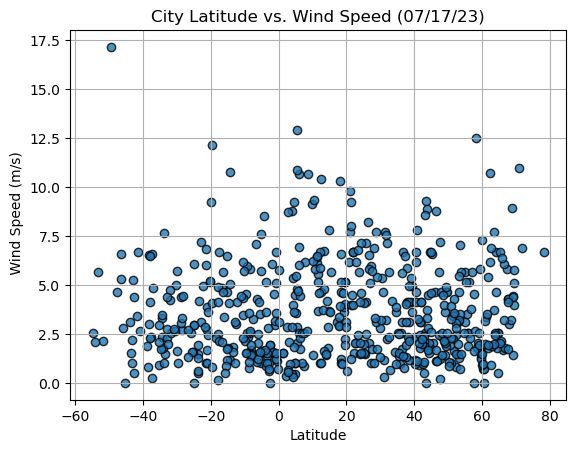

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("(%x)"))
plt.ylabel(" Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values,y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print(f"The r-value is: {r_value}")
    regress_values = x_values * slope + intercept
    #Equation of the line 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
#scatter plot and plot regression line/ Annotation for the line equation
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,28.18,78,100,2.24,US,2023-07-17 21:49:44
1,sargatskoye,55.6101,73.4972,16.93,63,100,3.51,RU,2023-07-17 21:49:45
4,badger,64.8000,-147.5333,23.33,52,75,2.57,US,2023-07-17 21:49:45
5,lycksele,64.5954,18.6735,13.02,100,100,0.51,SE,2023-07-17 21:49:45
6,murzuq,25.9155,13.9184,31.37,12,15,4.12,LY,2023-07-17 21:49:46


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto ayora,-0.7393,-90.3518,29.98,91,94,3.58,EC,2023-07-17 21:49:45
3,antofagasta,-23.6500,-70.4000,17.60,78,21,1.49,CL,2023-07-17 21:49:45
7,puerto natales,-51.7236,-72.4875,-0.35,90,74,2.13,CL,2023-07-17 21:45:50
8,port-aux-francais,-49.3500,70.2167,5.83,81,96,17.14,TF,2023-07-17 21:49:46
9,papatowai,-46.5619,169.4708,10.93,84,87,6.58,NZ,2023-07-17 21:49:46


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6409014602340861


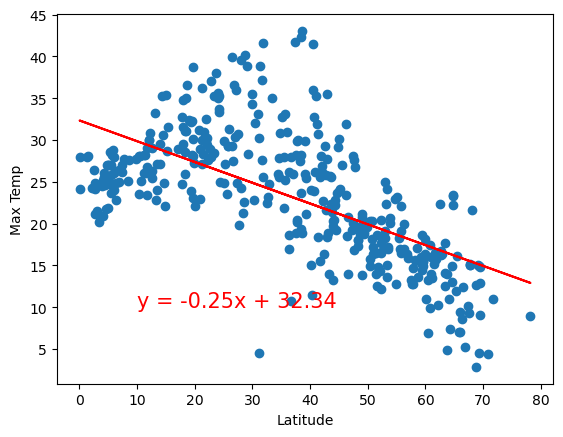

In [16]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regression_plot(x_values, y_values, y_label='Max Temp', text_coordinates=(10,10))

The r-value is: 0.8318082534886896


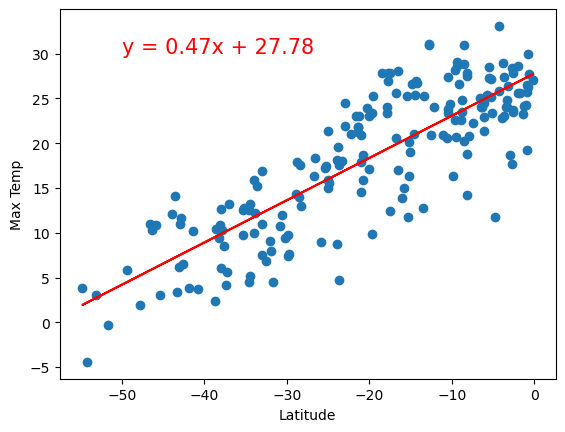

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear_regression_plot(x_values, y_values, y_label='Max Temp', text_coordinates=(-50,30))

**Discussion about the linear relationship:** Correlation among Max Temperature and Latitude in Northern Hemishphere is negative and the higher the Latitude the lower Temperature. 
Correlation among Max Temperature and Latitude in Sothern Hemisphere shows a positive relation and with increase of the Temperature the Latitude goes up. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.04494842986737573


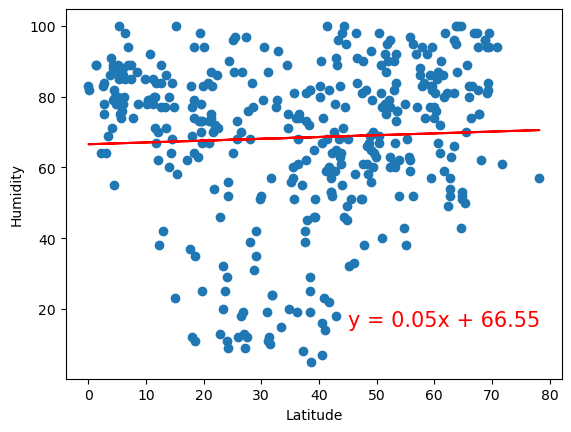

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression_plot(x_values, y_values, y_label="Humidity", text_coordinates=(45,15))

The r-value is: -0.011173762440052987


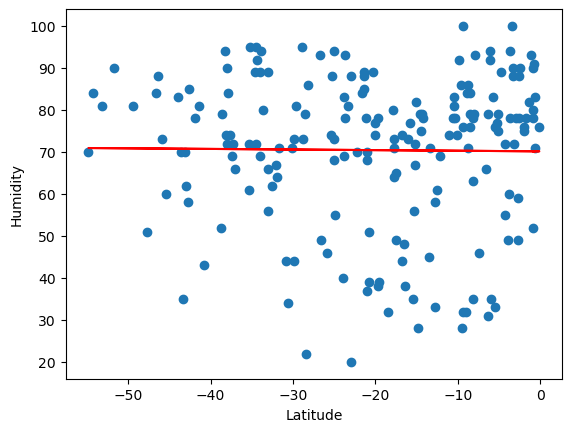

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression_plot(x_values, y_values, y_label="Humidity", text_coordinates=(-50,15))

**Discussion about the linear relationship:** Northern Hemisphere Latitude has a low positive correlation with humidity the increase latitude cause the humidity goes slowly higher. 
Sothern Hemisphere Humidity has a negative relation with latitude and is very very low. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.00878850018444309


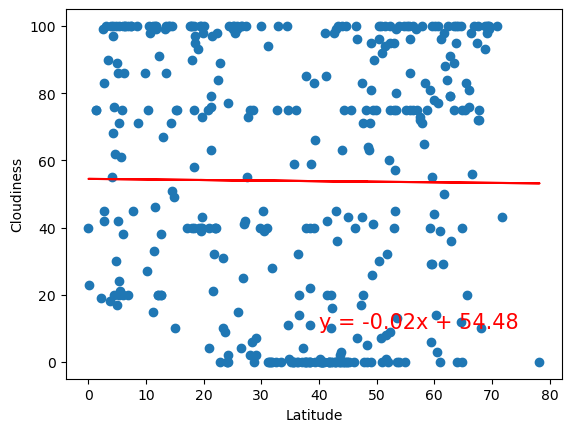

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression_plot(x_values, y_values, y_label="Cloudiness",text_coordinates=(40,10))

The r-value is: 0.033286983756034394


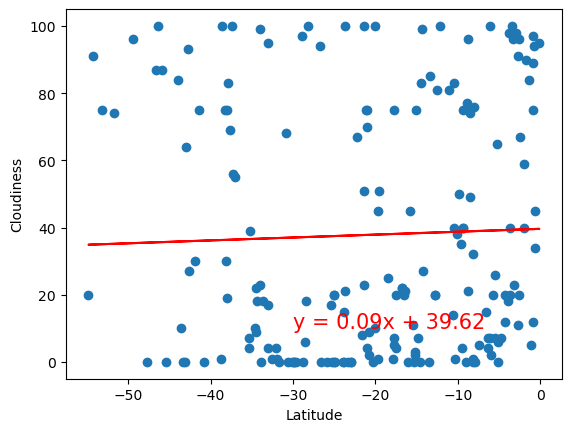

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_regression_plot(x_values, y_values, y_label="Cloudiness",text_coordinates=(-30,10))

**Discussion about the linear relationship:** On both Northen and Southern Hemisphere there are very low correlation with cloudiness. R-value is very close to 0 on both Hemisphere.  

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.11485974631628554


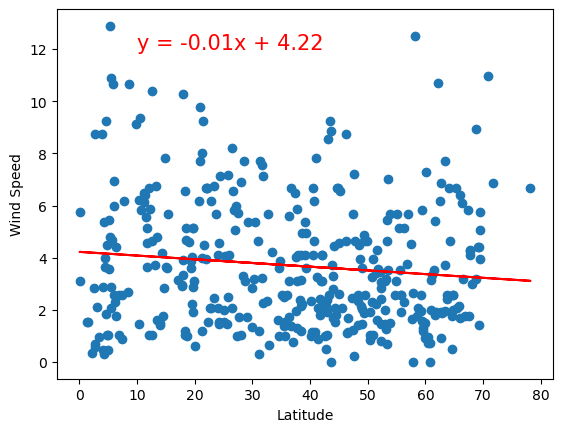

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression_plot(x_values, y_values, y_label= "Wind Speed",text_coordinates=(10,12))

The r-value is: -0.12048305924429477


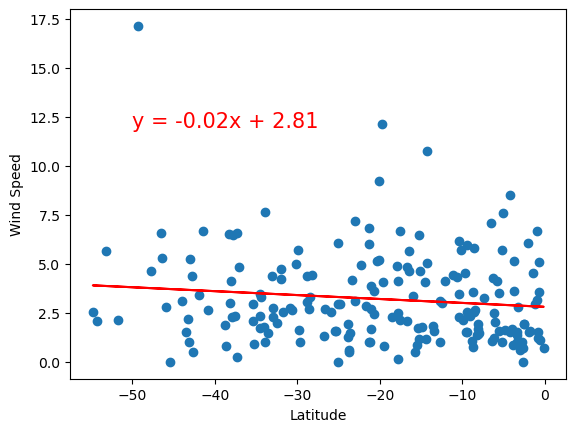

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_regression_plot(x_values, y_values, y_label= "Wind Speed",text_coordinates=(-50,12))

**Discussion about the linear relationship:** There is very low negative correlation among Wind Speed and latitude on North and South Hemisphere. In Northern Hemisphere the speed in majority of the cities is between 0 and 10.
In sothern Hemisphere wind speed slowly increases and it between 0 to 7.5.There is very little or no correlation between wind and Latitude. 